In [33]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [34]:
env = gym.make('FrozenLake-v0')

In [48]:
# Set up Q table
num_observations = env.observation_space.n
num_actions = env.action_space.n
Q_table = np.zeros([num_observations, num_actions])

# Hyperparameters
learning_rate = 0.8
gamma = 0.95
num_episodes = 2000
max_actions_per_episode = 100

# Logging
cumulative_reward = 0
cumulative_reward_list = []
reward_list = []

# Start training
for episode in range(num_episodes):
    state = env.reset()
    episode_reward = 0
    
    done = False
    noise_weight = 1.0/(episode+1)
    for step in range(max_actions_per_episode):
        # Generate random noise for the actions
        Q_noise = np.random.randn(1, num_actions)
        
        # Inversly weight Q noise by number of elapsed episodes(annealing)
        Q_noise *= noise_weight
        
        # Choose an action with noise
        action = np.argmax(Q_table[state,:] + Q_noise)
        
        # Take a step and get next state, reward and done flag from environment
        state_new, reward, done, _ = env.step(action)
        
        # Update the Q table with new knowledge
        # We want to update the value in the table slowly, keeping some of
        # the previous Q. This may help to counter stochasticity in the
        # environment
        # Get the Q values for the state prior to and after the action
        current_Q = Q_table[state, action]
        max_next_Q = np.max(Q_table[state_new, :])
        
        # Compute the new Q value
        new_Q = (1-learning_rate) * current_Q + \
                learning_rate*(reward + gamma * max_next_Q)
        
        # Update the Q value for the state and action prior to the action
        Q_table[state, action] = new_Q
        
        # Current state = next state
        state = state_new
        
        episode_reward += reward
        
        # End the episode if we're at the goal
        if done == True:
            break
            
    reward_list.append(episode_reward)
    cumulative_reward += episode_reward
    cumulative_reward_list.append(cumulative_reward)

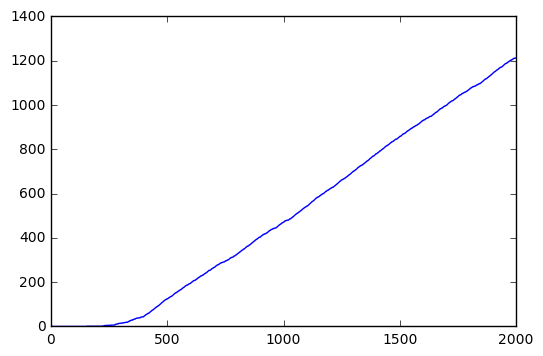

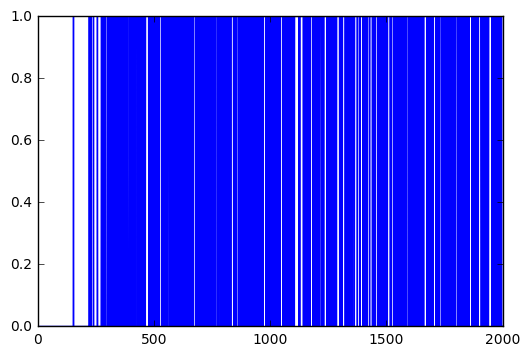

In [49]:
plt.plot(cumulative_reward_list)

plt.show()
plt.plot(reward_list)
plt.show()

In [47]:
env.step(1)

(4, 0.0, True, {'prob': 0.3333333333333333})

In [24]:
1./9

0.1111111111111111

In [25]:
1/9

0.1111111111111111

In [26]:
env.reset()

0